### **Student Performance Dataset**

---

El conjunto de datos Student Performance contiene datos sobre el rendimiento de los estudiantes en la educación secundaria. Los datos se recopilaron del sitio web del Departamento de Educación de EE. UU. e incluyen variables como el sexo del estudiante, la raza, la educación de los padres, el almuerzo, la preparación para los exámenes y las puntuaciones en matemáticas, lectura y escritura.

Podemos usar este conjunto de datos para seguir el progreso de los estudiantes a lo largo del tiempo. Esto puede servir para identificar las áreas en las que los estudiantes necesitan mejorar y para controlar la eficacia de las intervenciones. El conjunto de datos también puede utilizarse para comparar el rendimiento de diferentes grupos de estudiantes.


El objetivo de este trabajo es la construcción de un modelo de predicción de la nota final de los alumnos. 

Este dataset está disponible en el siguiente enlace:
https://www.kaggle.com/spscientist/students-performance-in-exams

La variable objetivo en este trabajo es la nota final del alumno.

#### **Descripción de las variables**

* gender -- Género del alumno.
* race/ethnicity -- Raza del alumno.
* parental level of education -- Nivel de estudio

#### **Preguntas**

- ¿Cuál es la eficacia del curso de preparación para los exámenes?
- ¿Qué factores principales contribuyen a los resultados de los exámenes?
- ¿Cuál sería la mejor manera de mejorar los resultados de los estudiantes en cada prueba?
- ¿Qué patrones e interacciones se pueden encontrar en los datos?
- ¿Cómo difiere el rendimiento medio de los estudiantes por género? 
- ¿Cómo difiere el rendimiento medio de los estudiantes por raza?  
- ¿Cómo difiere el rendimiento medio de los estudiantes por educacion? 
- ¿Cómo varía el rendimiento de los alumnos por asignatura?

### **Importacion de las librerias y datos**

---


In [1]:
# Data analysis imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('darkgrid')
colors = sns.color_palette('pastel')
%matplotlib inline

# Machine learning imports
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
# Data extraida de kaggle
df_data = pd.read_csv('https://raw.githubusercontent.com/Xukay101/curso-data-science/main/datasets/exams.csv')

In [3]:
# Inspeccion rapida de los datos
df_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### **Limpieza y procesamiento de los datos**

---

In [4]:
# Renombrado de columnas
df_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df_data = df_data.rename(columns={
    'gender':'gender', 'race/ethnicity':'race_ethnicity',
    'parental level of education':'education',
    'test preparation course': 'test_preparation_course',
    'math score':'math_score', 'reading score':'reading_score',
    'writing score':'writing_score'})
df_data.columns

Index(['gender', 'race_ethnicity', 'education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
# Comprobación de tipos de datos, valores únicos y valores perdidos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race_ethnicity           1000 non-null   object
 2   education                1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Nueva columna con el promedio de los puntos
df_data['avg_score'] = df_data[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round()

###  **Exploración de datos (EDA)**

---

In [8]:
df_data.describe()

,math_score,reading_score,writing_score,avg_score
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,66.396000,69.002000,67.738000,67.71200
std,15.402871,14.737272,15.600985,14.50467
min,13.000000,27.000000,23.000000,22.00000
25%,56.000000,60.000000,58.000000,58.75000
50%,66.500000,70.000000,68.000000,67.00000
75%,77.000000,79.000000,79.000000,78.00000
max,100.000000,100.000000,100.000000,100.00000


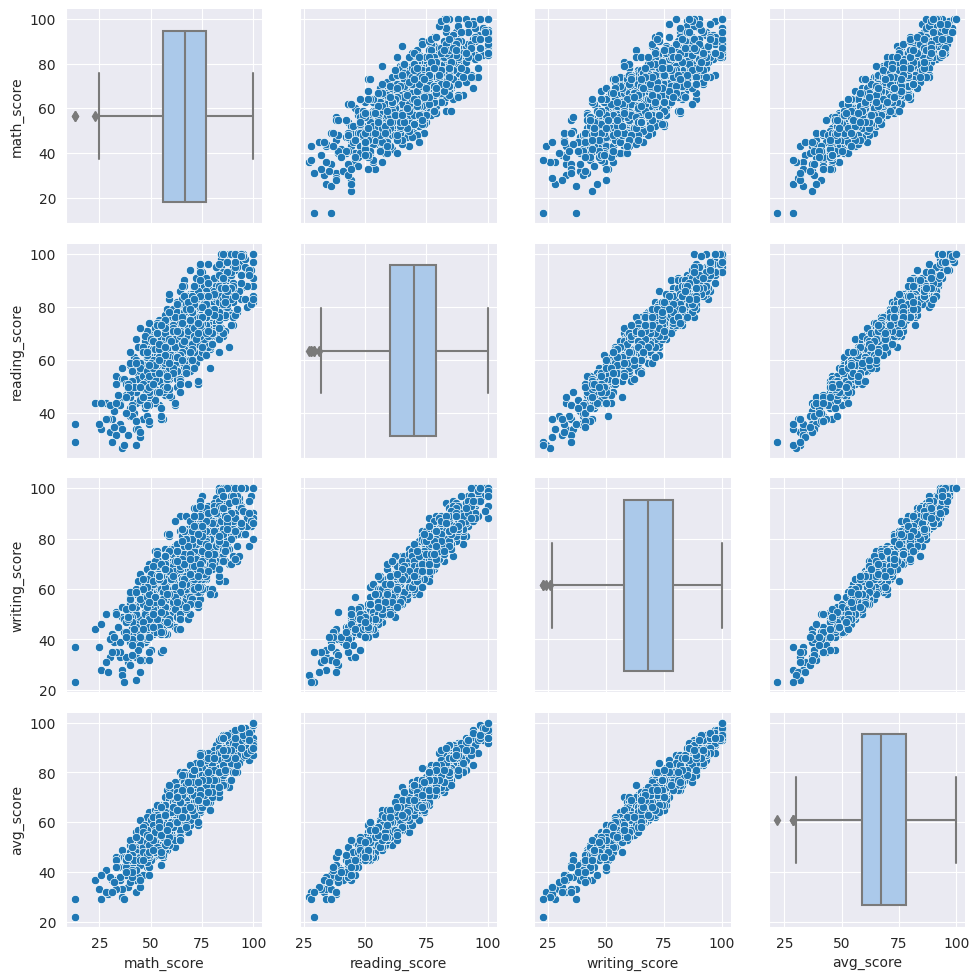

In [9]:
g = sns.PairGrid(df_data, palette=colors)
g.map_diag(sns.boxplot)
g.map_offdiag(sns.scatterplot)

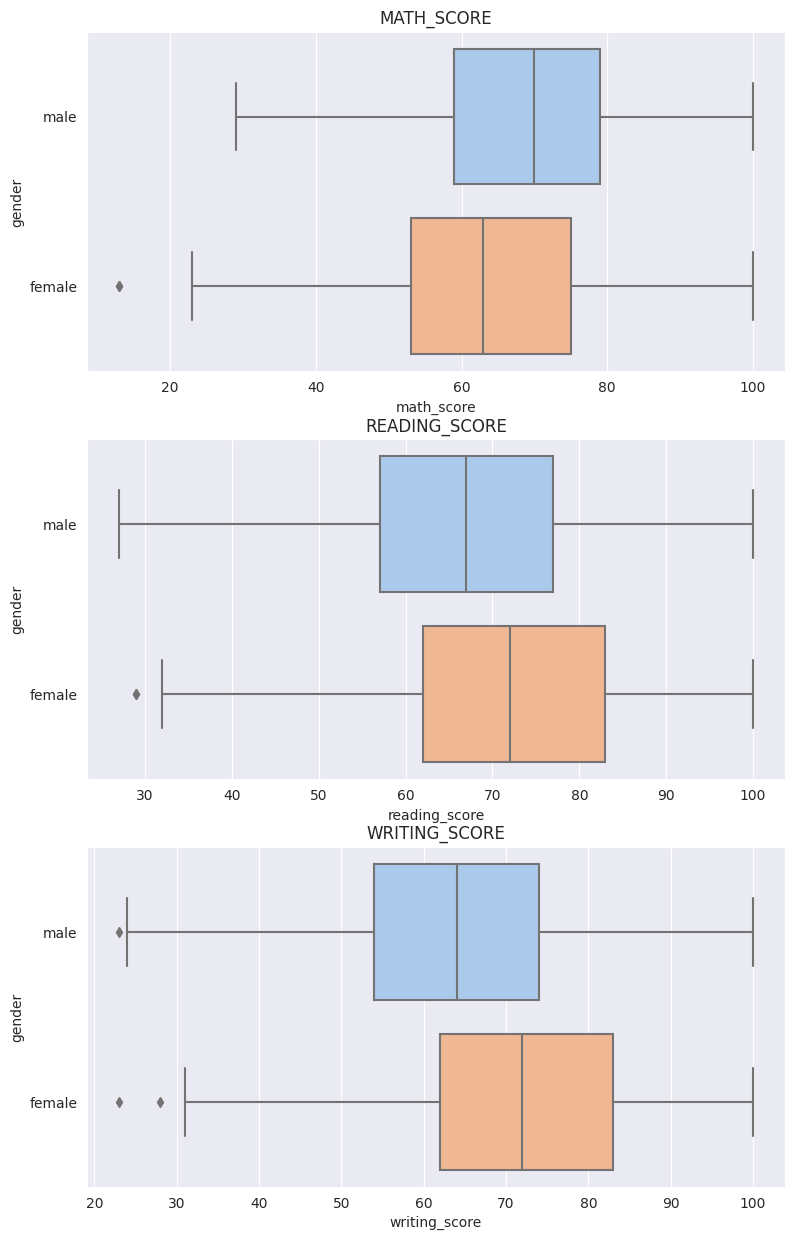

In [10]:
# Boxplot de notas por genero
scores=['math_score', 'reading_score', 'writing_score']
fix, ax = plt.subplots(figsize=(9,15), nrows=3, ncols=1)
for i,score in enumerate(scores):
    sns.boxplot(data=df_data, x=score,y= df_data['gender'], ax=ax[i], palette=colors)
    ax[i].set_title(score.upper())

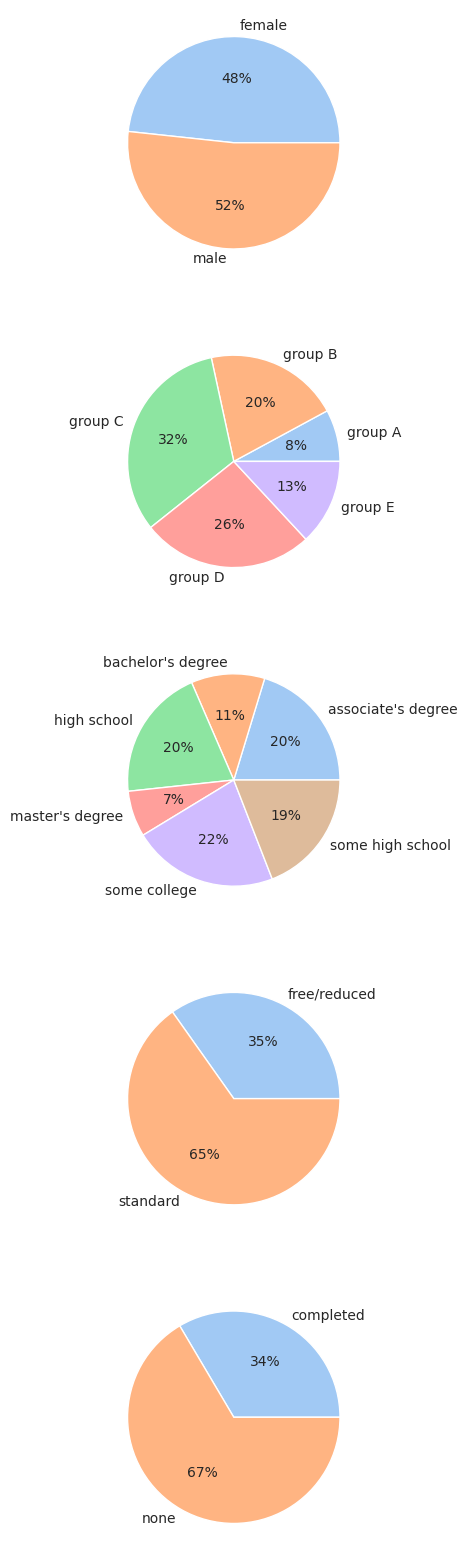

In [11]:
fig, axes = plt.subplots(5, figsize=(15, 20))

temp = df_data.groupby('gender').size()
axes[0].pie(temp.values, labels=list(temp.index), colors=colors, autopct='%.0f%%')

temp = df_data.groupby('race_ethnicity').size()
axes[1].pie(temp.values, labels=list(temp.index), colors=colors, autopct='%.0f%%')

temp = df_data.groupby('education').size()
axes[2].pie(temp.values, labels=list(temp.index), colors=colors, autopct='%.0f%%')

temp = df_data.groupby('lunch').size()
axes[3].pie(temp.values, labels=list(temp.index), colors=colors, autopct='%.0f%%')

temp = df_data.groupby('test_preparation_course').size()
axes[4].pie(temp.values, labels=list(temp.index), colors=colors, autopct='%.0f%%')

plt.show()

<AxesSubplot:xlabel='race_ethnicity', ylabel='avg_score'>

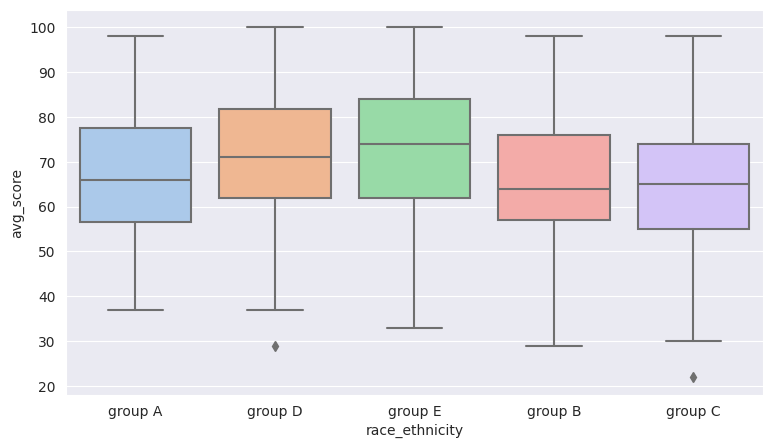

In [12]:
# Puntos promedio por cada grupo
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_data, x='race_ethnicity', y='avg_score', palette=colors)

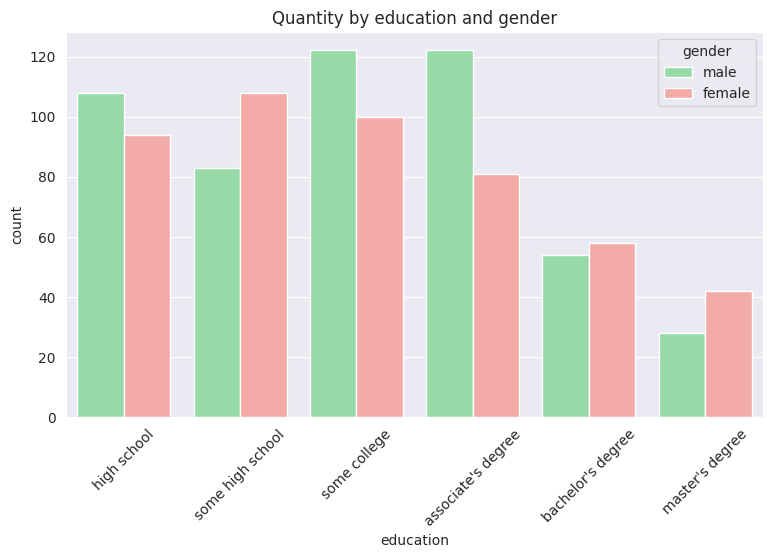

In [13]:
plt.figure(figsize=(9, 5))
sns.countplot(x='education', hue='gender', data=df_data, palette=colors[2:])
plt.xticks(rotation=45)
plt.title('Quantity by education and gender')
plt.show()

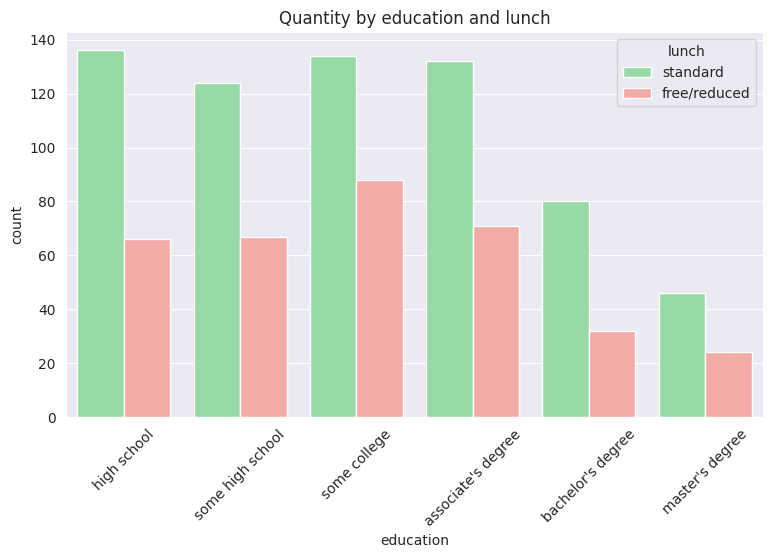

In [14]:
plt.figure(figsize=(9, 5))
sns.countplot(x='education', hue='lunch', data=df_data, palette=colors[2:])
plt.xticks(rotation=45)
plt.title('Quantity by education and lunch')
plt.show()

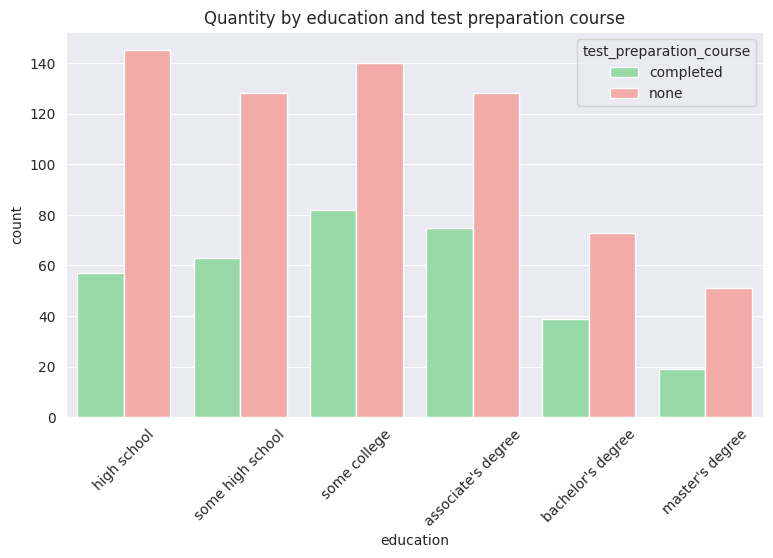

In [15]:
plt.figure(figsize=(9, 5))
sns.countplot(x='education', hue='test_preparation_course', data=df_data, palette=colors[2:])
plt.xticks(rotation=45)
plt.title('Quantity by education and test preparation course')
plt.show()

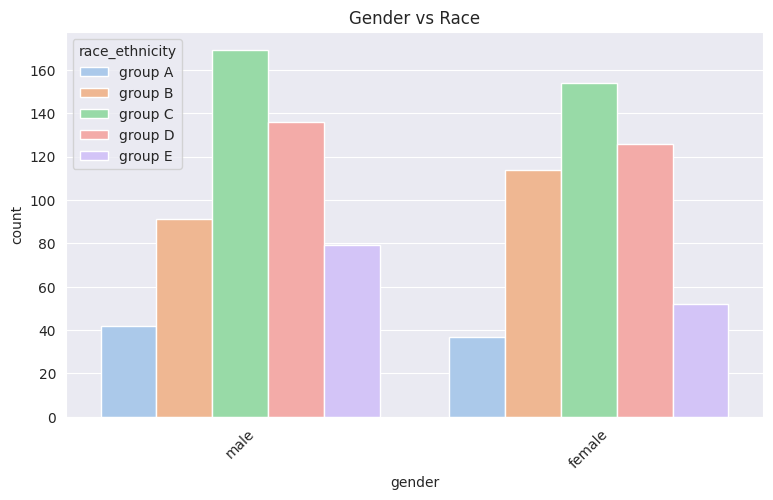

In [16]:
plt.figure(figsize=(9, 5))
hue_order = ['group A', 'group B', 'group C', 'group D', 'group E']
sns.countplot(x='gender', hue='race_ethnicity', data=df_data, palette=colors, hue_order=hue_order)
plt.xticks(rotation=45)
plt.title('Gender vs Race')
plt.show()

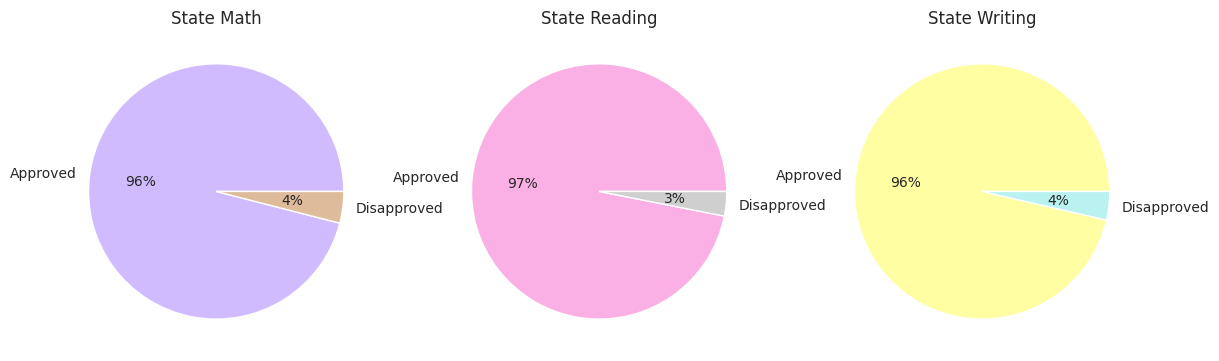

In [17]:
# Cantidad de aprobados
approval_limit = 40

df_temp = pd.DataFrame()
df_temp['state_math'] = np.where(df_data['math_score']<approval_limit, 'Disapproved', 'Approved')
df_temp['state_reading'] = np.where(df_data['reading_score']<approval_limit, 'Disapproved', 'Approved')
df_temp['state_writing'] = np.where(df_data['writing_score']<approval_limit, 'Disapproved', 'Approved')

fig, axes = plt.subplots(figsize=(14, 6), nrows=1, ncols=3)

temp = df_temp.groupby('state_math').size()
axes[0].pie(temp.values, labels=list(temp.index), colors=colors[4:], autopct='%.0f%%')
axes[0].set_title('State Math')

temp = df_temp.groupby('state_reading').size()
axes[1].pie(temp.values, labels=list(temp.index), colors=colors[6:], autopct='%.0f%%')
axes[1].set_title('State Reading')

temp = df_temp.groupby('state_writing').size()
axes[2].pie(temp.values, labels=list(temp.index), colors=colors[8:], autopct='%.0f%%')
axes[2].set_title('State Writing')

plt.show()


###  **Modelado de datos**

---

#### Preprocessing

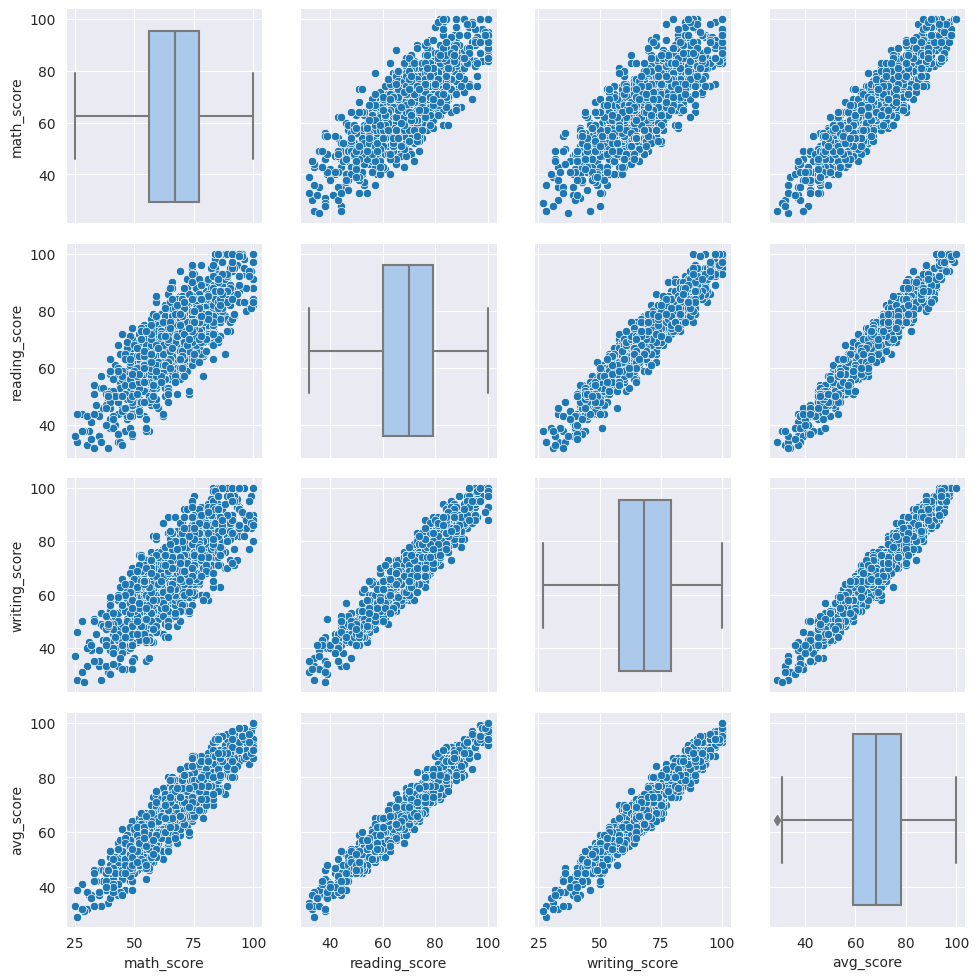

In [18]:
# IQR
Q1 = np.percentile(df_data['math_score'], 25,
                   method = 'midpoint')
Q3 = np.percentile(df_data['math_score'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

# Datos por arriba y abajo
upper = df_data['math_score'] >= (Q3+1.5*IQR)
lower = df_data['math_score'] <= (Q1-1.5*IQR)

# Remover los atipicos
df_data.drop(df_data.index[lower], inplace=True)

# IQR
Q1 = np.percentile(df_data['reading_score'], 25,
                   method = 'midpoint')
Q3 = np.percentile(df_data['reading_score'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

# Datos por arriba y abajo
upper = df_data['reading_score'] >= (Q3+1.5*IQR)
lower = df_data['reading_score'] <= (Q1-1.5*IQR)

# Remover los atipicos
df_data.drop(df_data.index[lower], inplace=True)

g = sns.PairGrid(df_data, palette=colors)
g.map_diag(sns.boxplot)
g.map_offdiag(sns.scatterplot)

In [19]:
# Transformacion de datos categoricos en numericos utilizando label encoder
labelencoder = LabelEncoder()
df_data['gender_cat'] = labelencoder.fit_transform(df_data['gender'])
df_data['race_ethnicity_cat'] = labelencoder.fit_transform(df_data['race_ethnicity'])
df_data['education_cat'] = labelencoder.fit_transform(df_data['education'])
df_data['lunch_cat'] = labelencoder.fit_transform(df_data['lunch'])
df_data['test_preparation_course_cat'] = labelencoder.fit_transform(df_data['test_preparation_course'])

# Escalado de los datos numericos
standartscaler = StandardScaler()

columns = ['math_score', 'reading_score']
scaled = ['math_score_scaled', 'reading_score_scaled']
df_data[scaled] = standartscaler.fit_transform(df_data[columns])

In [20]:
# Seleccion de la variable dependiente e independiente
X = df_data[[
    'gender_cat', 'race_ethnicity_cat', 'education_cat',
    'lunch_cat', 'test_preparation_course_cat']]
y = df_data['avg_score']

# Division de los datos 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

#### Modelado